# Graphs with Python

The Python package NetworkX has many functions for manipulating and investigating graphs. For example, the following code demonstrates two
ways to create a graph representing a directed 3-cycle.

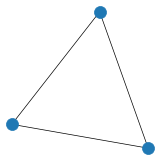

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create and plot undirected graph using edge list

G1 = nx.Graph()
edge_list = [(0, 1), (1, 2), (2, 0)]
G1.add_edges_from(edge_list)
plt.figure(figsize=(3,3), dpi=25)
nx.draw(G1)

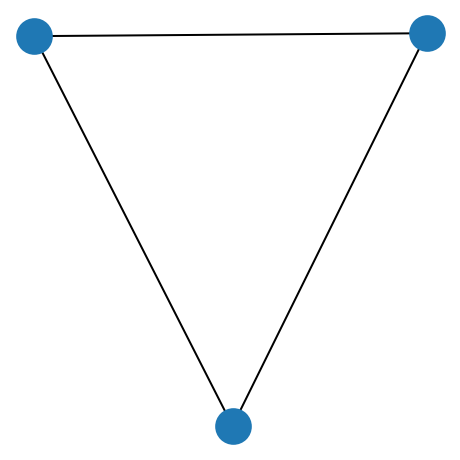

In [17]:
# Create and plot undirected graph using adjacency matrix

adj_matrix = np.array([[0, 1, 0],
                      [0, 0, 1],
                      [1, 0, 0]])
G2=nx.from_numpy_matrix(adj_matrix)
plt.figure(figsize=(3,3), dpi=25)
nx.draw(G2)


The following tutorial is a good starting point for understanding how to use NetworkX:

https://networkx.org/documentation/stable/tutorial.html

Refer to the following URL for more the full documentation:

<https://networkx.org>

### Question 1

Use NetworkX to plot a *directed* graph of the [egg-laying circuit](egg-laying-circuit).

## Useful Python graph functions

``` python
import networkx as nx
```
**Create directed graph from edge list or adjacency matrix**

``` python
# Use here the class DiGraph from module networkx for directed graphs:
G = nx.DiGraph()
# For graph from adjacency matrix use the function:
nx.from_numpy_matrix('adjacency matrix inputted here', create_using=G)
# For graph from edge list use function:
G.add_edges_from('edge list inputted here')
```
**Create undirected graphs**
``` python
# Similarly to directed graphs, first initialise an undirected graph:
G = nx.Graph()
# Using an adjacency matrix:
nx.from_numpy_matrix('adjacency matrix inputted here', create_using=G)
# Using an edge list:
G.add_edges_from('edge list inputted here')
```

**Get number of nodes and edges**
``` python
G.number_of_edges() # either returns the number of edges between two nodes if specified or the total number of edges
G.number_of_nodes() # returns number of nodes
```

**Remove loops and multiple edges**
There is no straight forward way to simplify a graph with networkx in Python.
Here are a few functions which are useful workarounds.
```python
G.add_edges_from(list(set('edgelist'))) # use of set removes any duplicates in a given list
G.remove_edges_from(nx.selfloop_edges(G)) # removes loops
G.is_simple_path('nodes') # checks if the nodes inputted form a simple path 
```

**Create a subgraph**
```python
G.subgraph('nodes inputted here')
```

**Calculate distance matrix between node pairs**
```python
# For unweighted graph
nx.all_pairs_shortest_path(G) # calculates shortest paths between all nodes
nx.all_pairs_shortest_path_length(G) # lengths of shortest paths between nodes 
# And similarly for weighted graphs:
nx.all_pairs_dijkstra_path(G)
nx.all_pairs_dijkstra_path_length(G)
```

**Find strongly and weakly connected components**
``` python
nx.weakly_connected_components(G)
nx.strongly_connected_components(G)
# Get number of strongly/weakly connected components:
nx.number_strongly_connected_components(G)
nx.number_weakly_connected_components(G)
```
**Find shortest path between nodes**
```python
nx.shortest_path(G, 'source node inputted here', 'target node inputted here')
```

**Plot graph and set node colour**
```python
# Use the networkx drawing modules:
from networkx.drawing.nx_pylab import draw, draw_networkx
draw(G, node_color='b') # can change colour and other properties here
draw_networkx(G) # an alternative function that works the same as draw
nx.relabel_nodes(G,mapping={0:1,1:2,2:3}) # can relabel nodes so the ordering is the same as in matlab

# Use matplotlib to display the network
import matplotlib.pyplot as plt
plt.show()
```

### Example


{1, 2, 3}


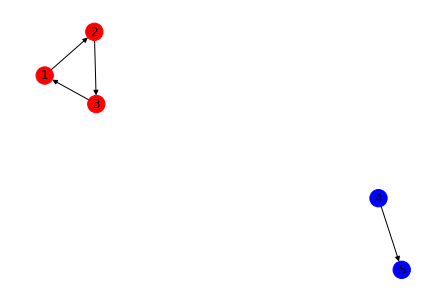

In [3]:

import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pylab import draw

# Create a graph from an edge list 
edges = [(1, 2), (2, 3), (3, 1), (4,5)]
G = nx.DiGraph()
G.add_edges_from(edges)

# Determine its connected components and color the largest one
largest_cc = max(nx.weakly_connected_components(G), key=len)
print('Largest connected component:',largest_cc)
color_map = []
for node in G:
    if node in largest_cc:
        color_map.append('red')
    else:
        color_map.append('blue')
draw(G, with_labels=True, node_color=color_map)
plt.show()

### Question 1
1.  Draw a picture (by hand) of a connected simple digraph with ten nodes and three strongly connected components.
1. Use Python to:
    1. Create and plot your graph.
    1. Colour the nodes according to their strongly connected component.
    1. Determine the pair of nodes i, j with the greatest path distance. Hint: the following functions gives the general workflow however you will need to add some lines to find the greatest path distance. <br>
        *d = dict(nx.all_pairs_shortest_path_length(G))* <br>
        *m = max(d)* <br>
        *i,j = np.where(d==m)* 
    1. Determine the shortest path between i and j and increase the width of its edges to 2 points.

In this workshop we will start investigating real nervous system connectivity data. To do this we will need to import the data into Python.

## Importing Data into Python

We are used to storing and manipulating data in Python Numpy arrays. However, arrays may only be used for storing numerical data. For other types of data (such as text) Python has a different package called Pandas which works with **dataframes**. Much like a database table, Pandas dataframes store rows of data consisting of multiple heterogeneous data types. In the next question we will import connectivity data of the C-Elegans into a Pandas dataframe.

### Question 2
1. We would like to import the *herm_full_edgelist.csv* file (available on Moodle). 
1. Pandas has a function called *read_csv(filename)* which is used for importing csv files like the one above.
1. Use this function and assign a variable (e.g. hermfulledgelist) to the result (make sure the file has been added to your working directory so Pandas can find it).
1. A dataframe is created and you can view it with *print(hermfulledgelist)* (replacing with the variable name you have chosen if different). If you would like to only view the first few lines of the dataframe you can use *print(hermfulledgelist.head())*.

```{admonition} What is a CSV file?
```
We would like to build a Python graph representing the connectivity data. To do this, we need to select rows of type ‘chemical’ then extract the Source and Target columns.

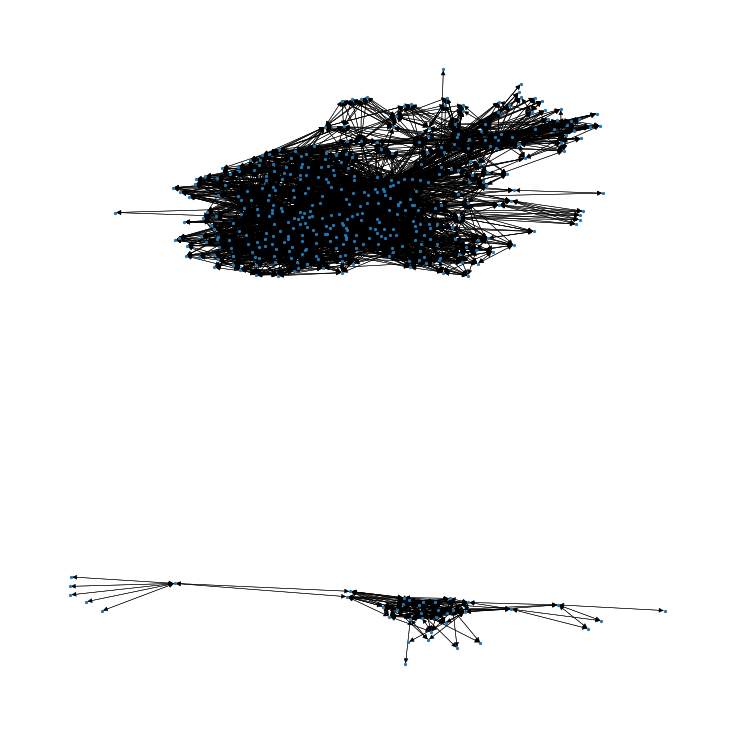

In [206]:
{
    "tags": [
        "remove-output"
    ]
}

import pandas as pd
import numpy as np

hermfulledgelist = pd.read_csv('herm_full_edgelist.csv')

df = hermfulledgelist[hermfulledgelist.Type=='chemical']
df = df.apply(lambda x: x.astype(str).str.strip())
G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.Graph)
G = G.to_directed()
plt.figure(1,figsize=(10,10))
draw(G, node_size=5, width=0.5)
plt.show()


### Question 3
1. Use the above code to generate a graph of the hermaphrodite C-Elegans neural circuit. Plot the graph, then print the number of nodes and number of edges.
1. What do you think the weight column represents? Adapt the code so that only connections with a weight of 10 or more are included. How did the number of nodes and edges change?

Let’s call the the C-Elegans circuit with minimum connection weight 10 ‘CE-10’. The graph of CE-10 consists of several connected components. Let’s discard everything apart from the largest one.

### Question 4
1. Determine and plot the largest connected component of CE-10 (you will need
to use subgraph).
1. How many components are there in CE-10?
1. How many neurons are in the second largest component of CE-10?
1. Plot the second largest component of CE-10. (Hint: use len(c) for c in sorted(nx.weakly_connected_components(G), key=len) to order the components by size)

We say that one neuron is **downstream** of another if it can be reached by following synaptic connections. The downstream neurons are ones that can be influenced by activity of the upstream neuron. Let’s find all neurons downstream of neuron ‘SMDDL’ by following paths from its node in the graph.


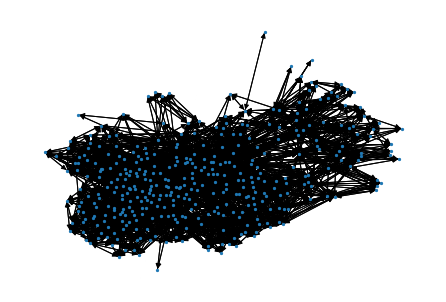

In [207]:
{
    "tags": [
        "remove-output"
    ]
}

nodes = list(G.nodes)
i = nodes.index('SMDDL')

M = nx.to_numpy_matrix(G)
downstream = bfs(M,i)
J = nx.subgraph(G, [nodes[x] for x in downstream])
draw(J, node_size=5, width=0.5)
plt.show()

### Question 5
1. Use the above code to plot the graph of the neurons downstream of SMDDL.
1. Plot the graph of the neurons upstream of SMDDL. (Hint: reverse the edges of the graph).
1. What do you think the upstream and downstream neurons represent in terms of brain function?





In [230]:
def avg_path_length(G):
    d = dict(nx.all_pairs_shortest_path_length(G))
    n = len(d)
    nested_list_d = [list(d.values())[x].values() for x in range(n)]
    flat_list_d= [val for sublist in nested_list_d for val in sublist]
    result = np.mean(flat_list_d)
    return result


5

In [220]:
def clustering_coefficient(G,i):
    # Returns clustering coefficient of node
    #  i (in string form) of simple directed graph
    succ = set(G.successors(i))
    pre = set(G.predecessors(i))
    neighbours = succ.union(pre)
    H = nx.subgraph(G, neighbours)
    n = H.number_of_nodes()
    m = H.number_of_edges()
    result = m/(n**2-n)
    return result


0.15433673469387754